# Energy, Peak Frequency, 

In [163]:
from scipy.signal import spectrogram, welch

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from scipy.signal import find_peaks
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
background = np.load("../data/background.npz")['data']
bbh = np.load("../data/bbh_for_challenge.npy")
sglf = np.load("../data/sglf_for_challenge.npy")

In [3]:
multi_seg_back_0 = np.array([])
for i in range(100):
    multi_seg_back_0 = np.concatenate((multi_seg_back_0, background[i][0]), axis=0)
multi_seg_back_0.shape

(20000,)

In [4]:
multi_seg_bbh_0 = np.array([])
for i in range(100):
    multi_seg_bbh_0 = np.concatenate((multi_seg_bbh_0, bbh[i][0]), axis=0)
multi_seg_bbh_0.shape

(20000,)

In [5]:
multi_seg_sglf_0 = np.array([])
for i in range(100):
    multi_seg_sglf_0 = np.concatenate((multi_seg_sglf_0, sglf[i][0]), axis=0)
multi_seg_sglf_0.shape

(20000,)

In [6]:
# f, t, Sxx = spectrogram(multi_seg_back_0, fs=4096)
# plt.pcolormesh(t, f, Sxx, shading='gouraud')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]');

In [7]:
def total_energy(signal):
    total_energy = np.sum(signal ** 2)
    return total_energy
    

In [8]:
def num_zero_crosses(signal):
    num_cross = 0
    init = signal[0]
    for curr in signal[1:]:
        if (init > 0 and curr < 0) or (init < 0 and curr > 0):
            num_cross += 1
        init = curr
    return num_cross

In [9]:
total_energy(multi_seg_back_0)

9245.393245191275

In [10]:
total_energy(multi_seg_bbh_0)

9141.54006506142

In [11]:
total_energy(multi_seg_sglf_0)

12652.15235132306

In [12]:
back_power = np.apply_along_axis(total_energy, 1, np.reshape(multi_seg_back_0, (200, -1)))

In [13]:
bbh_power = np.apply_along_axis(total_energy, 1, np.reshape(multi_seg_bbh_0, (200, -1)))

In [14]:
sglf_power = np.apply_along_axis(total_energy, 1, np.reshape(multi_seg_sglf_0, (200, -1)))

(array([ 7., 12., 34., 23., 31., 22., 11.,  9.,  9.,  3.,  4.,  4.,  2.,
         5.,  8.,  6.,  6.,  1.,  2.,  1.]),
 array([ 25.59001511,  31.58682188,  37.58362865,  43.58043541,
         49.57724218,  55.57404895,  61.57085572,  67.56766249,
         73.56446925,  79.56127602,  85.55808279,  91.55488956,
         97.55169633, 103.54850309, 109.54530986, 115.54211663,
        121.5389234 , 127.53573016, 133.53253693, 139.5293437 ,
        145.52615047]),
 <BarContainer object of 20 artists>)

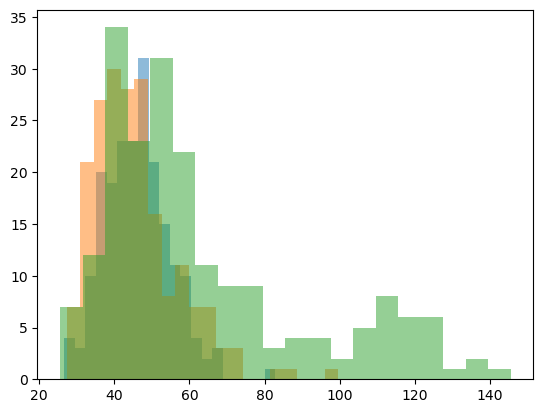

In [15]:
plt.hist(back_power, bins=20, alpha=0.5)
plt.hist(bbh_power, bins=20, alpha=0.5)
plt.hist(sglf_power, bins=20, alpha=0.5)

In [16]:
back_crosses = np.apply_along_axis(num_zero_crosses, 1, np.reshape(multi_seg_back_0, (200, -1)))
bbh_crosses = np.apply_along_axis(num_zero_crosses, 1, np.reshape(multi_seg_bbh_0, (200, -1)))
sglf_crosses = np.apply_along_axis(num_zero_crosses, 1, np.reshape(multi_seg_sglf_0, (200, -1)))

(array([ 3.,  9.,  6., 14., 11., 19., 14.,  5., 30.,  8., 23., 25.,  6.,
         9.,  6.,  3.,  6.,  2.,  0.,  1.]),
 array([21. , 22.6, 24.2, 25.8, 27.4, 29. , 30.6, 32.2, 33.8, 35.4, 37. ,
        38.6, 40.2, 41.8, 43.4, 45. , 46.6, 48.2, 49.8, 51.4, 53. ]),
 <BarContainer object of 20 artists>)

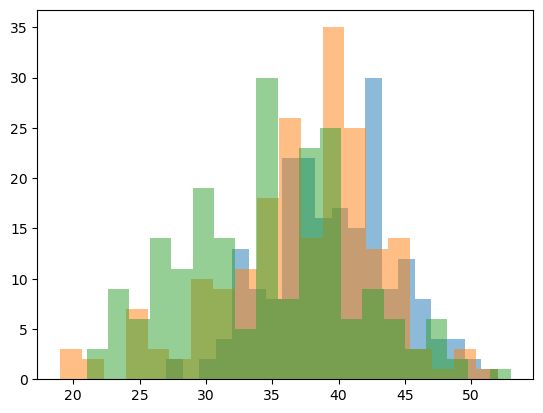

In [17]:
plt.hist(back_crosses, bins=20, alpha=0.5)
plt.hist(bbh_crosses, bins=20, alpha=0.5)
plt.hist(sglf_crosses, bins=20, alpha=0.5)

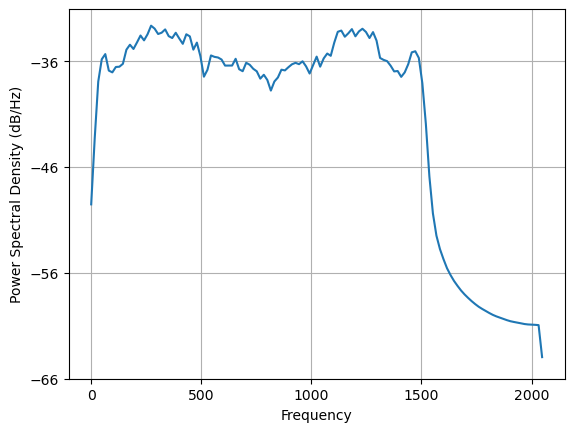

In [18]:
plt.psd(multi_seg_back_0, Fs=4096);

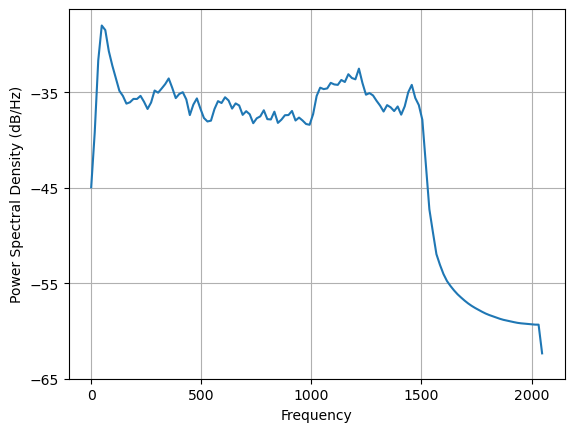

In [19]:
plt.psd(multi_seg_bbh_0, Fs=4096);

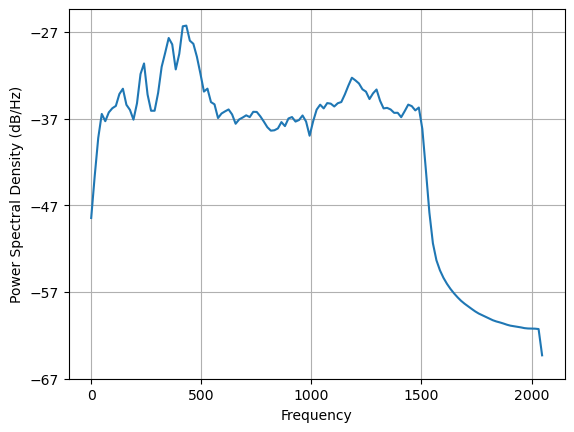

In [20]:
plt.psd(multi_seg_sglf_0, Fs=4096);

In [21]:
def extract_peak_frequency(data, sampling_rate=4096):
    fft_data = np.fft.fft(data)
    freqs = np.fft.fftfreq(len(data))
    
    peak_coefficient = np.argmax(np.abs(fft_data))
    peak_freq = freqs[peak_coefficient]
    
    return abs(peak_freq * sampling_rate)

In [26]:
np.reshape(multi_seg_sglf_0, (200, -1)).shape

(200, 100)

In [23]:
back_peak_freq = np.apply_along_axis(extract_peak_frequency, 1, np.reshape(multi_seg_back_0, (50, -1)))
bbh_peak_freq = np.apply_along_axis(extract_peak_frequency, 1, np.reshape(multi_seg_bbh_0, (50, -1)))
sglf_peak_freq = np.apply_along_axis(extract_peak_frequency, 1, np.reshape(multi_seg_sglf_0, (50, -1)))

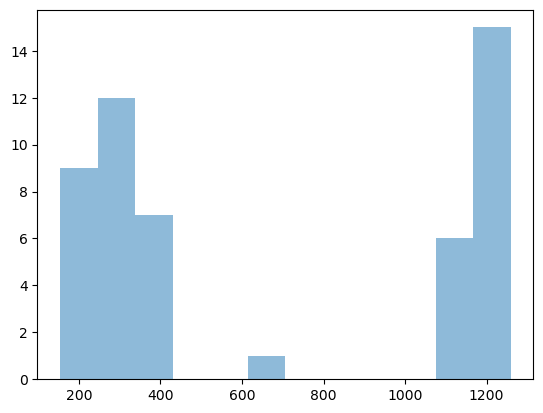

In [29]:
plt.hist(back_peak_freq, alpha=0.5, bins=12);

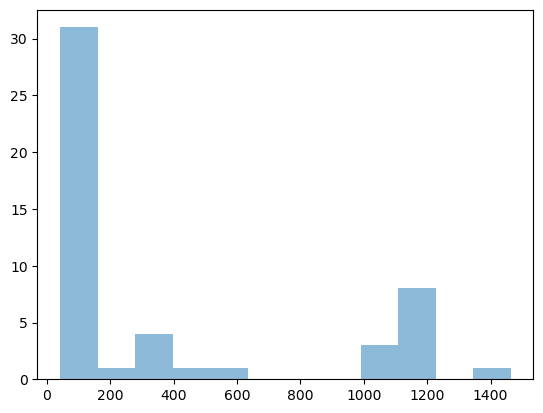

In [30]:
plt.hist(bbh_peak_freq, alpha=0.5, bins=12);


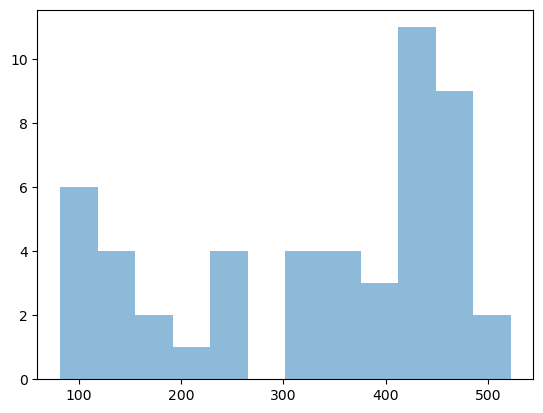

In [28]:
plt.hist(sglf_peak_freq, alpha=0.5, bins=12);

Kurtosis is not useful here

In [35]:
back_kurtosis = pd.Series(multi_seg_back_0).kurtosis()
back_kurtosis

-0.006529810989658991

In [36]:
bbh_kurtosis = pd.Series(multi_seg_bbh_0).kurtosis()
bbh_kurtosis

-0.0621350816424866

**PSD** is useful here when used with welch

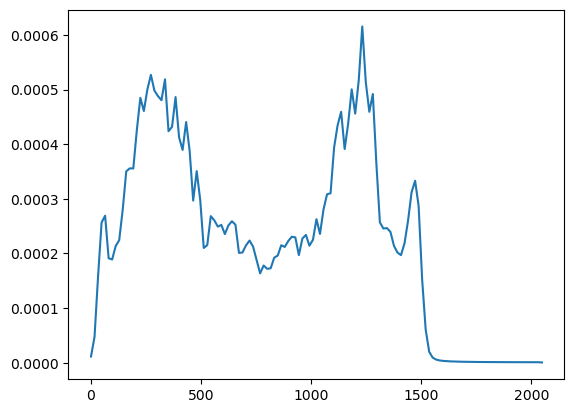

In [48]:
frequencies, psd = welch(multi_seg_back_0, fs=4096)
plt.plot(frequencies, psd)

In [105]:
welch(background[0][0], fs=4096)

(array([   0.  ,   20.48,   40.96,   61.44,   81.92,  102.4 ,  122.88,
         143.36,  163.84,  184.32,  204.8 ,  225.28,  245.76,  266.24,
         286.72,  307.2 ,  327.68,  348.16,  368.64,  389.12,  409.6 ,
         430.08,  450.56,  471.04,  491.52,  512.  ,  532.48,  552.96,
         573.44,  593.92,  614.4 ,  634.88,  655.36,  675.84,  696.32,
         716.8 ,  737.28,  757.76,  778.24,  798.72,  819.2 ,  839.68,
         860.16,  880.64,  901.12,  921.6 ,  942.08,  962.56,  983.04,
        1003.52, 1024.  , 1044.48, 1064.96, 1085.44, 1105.92, 1126.4 ,
        1146.88, 1167.36, 1187.84, 1208.32, 1228.8 , 1249.28, 1269.76,
        1290.24, 1310.72, 1331.2 , 1351.68, 1372.16, 1392.64, 1413.12,
        1433.6 , 1454.08, 1474.56, 1495.04, 1515.52, 1536.  , 1556.48,
        1576.96, 1597.44, 1617.92, 1638.4 , 1658.88, 1679.36, 1699.84,
        1720.32, 1740.8 , 1761.28, 1781.76, 1802.24, 1822.72, 1843.2 ,
        1863.68, 1884.16, 1904.64, 1925.12, 1945.6 , 1966.08, 1986.56,
      

In [106]:
frequencies, psd = welch(multi_seg_bbh_0, fs=4096)

Cross correlation could be good

In [107]:
def cross_corr(channel_1, channel_2):
    cross_corr = np.correlate(channel_1, channel_2, mode='full')
    lag = np.argmax(cross_corr) - len(channel_1) + 1
    return lag

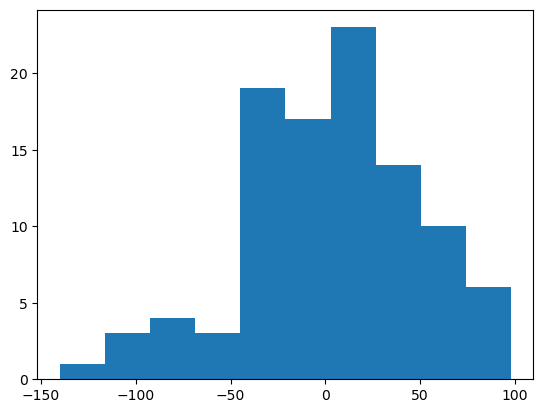

In [108]:
back_cross_corr = []
for i in range(100):
    corr = cross_corr(background[i][0], background[i][1])
    back_cross_corr.append(corr)
plt.hist(back_cross_corr);

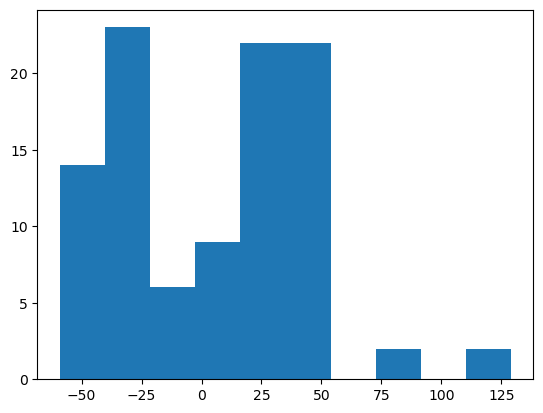

In [71]:
bbh_cross_corr = []
for i in range(100):
    corr = cross_corr(bbh[i][0], bbh[i][1])
    bbh_cross_corr.append(corr)
plt.hist(bbh_cross_corr);

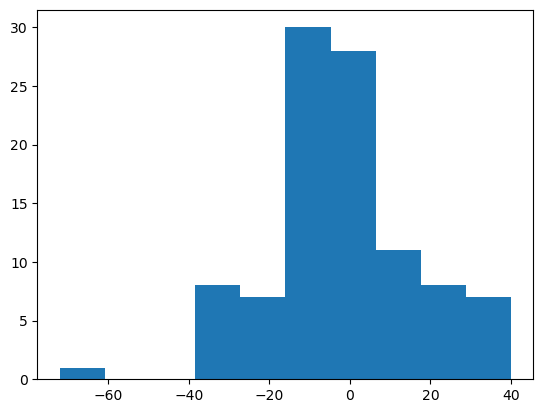

In [72]:
sglf_cross_corr = []
for i in range(100):
    corr = cross_corr(sglf[i][0], sglf[i][1])
    sglf_cross_corr.append(corr)
plt.hist(sglf_cross_corr);

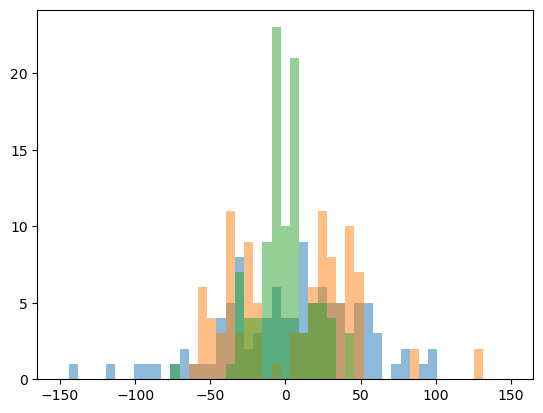

In [85]:
bins = np.linspace(-150, 150, 50)
plt.hist(back_cross_corr, bins, alpha=0.5, label='back')
plt.hist(bbh_cross_corr, bins, alpha=0.5, label='bbh')
plt.hist(sglf_cross_corr, bins, alpha=0.5, label='sglf');

In [79]:
peaks, _ = find_peaks(background[0][0], height=1.5)
peaks

array([150])

In [86]:
# im going to go segment by segment and see which features are the most important

In [89]:
background.shape

(100000, 2, 200)

In [154]:
back_df = pd.DataFrame(np.apply_along_axis(total_energy, 2, background))
back_df_2 = pd.DataFrame(np.apply_along_axis(extract_peak_frequency, 2, background))

In [155]:
back_cross_corr = []
for i in range(len(background)):
    corr = cross_corr(background[i][0], background[i][1])
    back_cross_corr.append(corr)
back_cross_corr = pd.Series(back_cross_corr)

In [156]:
back_df = pd.concat([back_df, back_df_2, back_cross_corr], axis=1)

In [157]:
back_df.columns = ["power_fc", "power_sc", "peak_freq_fc", "peak_freq_sc", "cross_corr"]

In [158]:
back_df['label'] = 0
back_df.head()

,power_fc,power_sc,peak_freq_fc,peak_freq_sc,cross_corr,label
0,104.089036,86.758556,1146.88,634.88,50,0
1,94.278428,87.887142,307.20,389.12,46,0
2,67.322822,77.246988,737.28,430.08,-34,0
3,79.127303,91.651794,286.72,1249.28,-9,0
4,82.177180,92.165586,348.16,471.04,-59,0


In [159]:
bbh_1 = pd.DataFrame(np.apply_along_axis(total_energy, 2, bbh))
bbh_2 = pd.DataFrame(np.apply_along_axis(extract_peak_frequency, 2, bbh))
bbh_cross_corr = []
for i in range(len(bbh)):
    corr = cross_corr(bbh[i][0], bbh[i][1])
    bbh_cross_corr.append(corr)
bbh_cross_corr = pd.Series(bbh_cross_corr)
bbh_df = pd.concat([bbh_1, bbh_2, bbh_cross_corr], axis=1)
bbh_df.columns = ["power_fc", "power_sc", "peak_freq_fc", "peak_freq_sc", "cross_corr"]
bbh_df['label'] = 1
bbh_df

,power_fc,power_sc,peak_freq_fc,peak_freq_sc,cross_corr,label
0,99.372934,96.684953,61.44,40.96,22,1
1,93.589439,89.880661,40.96,40.96,-47,1
2,74.466410,64.426210,40.96,40.96,47,1
3,105.917097,103.751818,61.44,40.96,22,1
4,93.564451,89.818175,61.44,40.96,22,1
...,...,...,...,...,...,...
99995,110.910084,84.542872,61.44,61.44,40,1
99996,108.799037,87.078303,61.44,61.44,-20,1
99997,108.486652,87.983790,61.44,61.44,-20,1
99998,90.313363,51.581654,1187.84,40.96,65,1


In [160]:
sglf_1 = pd.DataFrame(np.apply_along_axis(total_energy, 2, sglf))
sglf_2 = pd.DataFrame(np.apply_along_axis(extract_peak_frequency, 2, sglf))
sglf_cross_corr = []
for i in range(len(sglf)):
    corr = cross_corr(sglf[i][0], sglf[i][1])
    sglf_cross_corr.append(corr)
sglf_cross_corr = pd.Series(sglf_cross_corr)
sglf_df = pd.concat([sglf_1, sglf_2, sglf_cross_corr], axis=1)
sglf_df.columns = ["power_fc", "power_sc", "peak_freq_fc", "peak_freq_sc", "cross_corr"]
sglf_df['label'] = 2
sglf_df

,power_fc,power_sc,peak_freq_fc,peak_freq_sc,cross_corr,label
0,89.879830,63.356251,102.40,1290.24,-20,2
1,76.868639,54.877995,122.88,1208.32,-20,2
2,95.662806,64.571329,122.88,1290.24,15,2
3,94.061850,62.259344,122.88,122.88,18,2
4,94.902480,63.412988,1167.36,1290.24,18,2
...,...,...,...,...,...,...
99995,86.233608,73.800497,204.80,204.80,8,2
99996,88.318580,76.557027,204.80,204.80,9,2
99997,93.403762,73.387035,204.80,204.80,-29,2
99998,95.095813,73.342789,204.80,204.80,9,2


In [161]:
df = pd.concat([back_df, bbh_df, sglf_df], axis=0, ignore_index=True)
df

,power_fc,power_sc,peak_freq_fc,peak_freq_sc,cross_corr,label
0,104.089036,86.758556,1146.88,634.88,50,0
1,94.278428,87.887142,307.20,389.12,46,0
2,67.322822,77.246988,737.28,430.08,-34,0
3,79.127303,91.651794,286.72,1249.28,-9,0
4,82.177180,92.165586,348.16,471.04,-59,0
...,...,...,...,...,...,...
299995,86.233608,73.800497,204.80,204.80,8,2
299996,88.318580,76.557027,204.80,204.80,9,2
299997,93.403762,73.387035,204.80,204.80,-29,2
299998,95.095813,73.342789,204.80,204.80,9,2


In [162]:
X = df[['power_fc', 'power_sc', 'peak_freq_fc', 'peak_freq_sc', 'cross_corr']]
y = df['label']

In [164]:
X = sm.add_constant(X)

In [165]:
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                 1.047e+04
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        07:35:14   Log-Likelihood:            -3.4073e+05
No. Observations:              300000   AIC:                         6.815e+05
Df Residuals:                  299994   BIC:                         6.815e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.6594      0.004    417.137   

In [167]:
df.to_csv("../feature_engineered_segments.csv")